In [32]:
!pip install datasets
!pip install textblob 


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\albin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: C:\Users\albin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Libraries

In [26]:
from datasets import load_dataset
from pprint import pprint
import pandas as pd
import textwrap
from textblob import TextBlob


### Load User Reviews

In [4]:
dataset_electronics = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Electronics", trust_remote_code=True)
print(dataset_electronics["full"][0])

{'rating': 3.0, 'title': 'Smells like gasoline! Going back!', 'text': 'First & most offensive: they reek of gasoline so if you are sensitive/allergic to petroleum products like I am you will want to pass on these.  Second: the phone adapter is useless as-is. Mine was not drilled far enough to be able to tighten it into place for my iPhone 12 max. It just slipped & slid all over. Stupid me putting the adapter together first without picking up the binoculars to smell them bc I wasted 15 minutes trying to figure out how to put the adapter together bc it does not come with instructions!  I had to come back here to the website which was a total pain. Third: the tripod is also useless. I would not trust the iOS to hold my $1600 phone nor even a Mattel Barbie for that matter. It’s just inefficient for the job imo.  Third: in order to try to give an honest review I did don gloves & eyewear to check the binoculars out.  They seemed average except for mine seemed to be missing about 10% of the f

In [5]:
pprint(dataset_electronics)

{'full': Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 43886944
})}


In [11]:
print(pd.DataFrame(dataset_electronics["full"][:5]))


   rating                                        title  \
0     3.0            Smells like gasoline! Going back!   
1     1.0      Didn’t work at all lenses loose/broken.   
2     5.0                                   Excellent!   
3     5.0                       Great laptop backpack!   
4     5.0  Best Headphones in the Fifties price range!   

                                                text  \
0  First & most offensive: they reek of gasoline ...   
1  These didn’t work. Idk if they were damaged in...   
2  I love these. They even come with a carry case...   
3  I was searching for a sturdy backpack for scho...   
4  I've bought these headphones three times becau...   

                                              images        asin parent_asin  \
0  [{'attachment_type': 'IMAGE', 'large_image_url...  B083NRGZMM  B083NRGZMM   
1                                                 []  B07N69T6TM  B07N69T6TM   
2                                                 []  B01G8JO5F2  B01G8JO5

### Sample a subset for EDA

In [33]:
sample_size = 1000000
df = pd.DataFrame(dataset_electronics["full"][:sample_size])
df.dropna(inplace=True)  # Remove missing values
df["text"] = df["text"].str.lower()  # Convert text to lowercase
df["text"] = df["text"].str.replace(r"[^\w\s]", "", regex=True)  # Remove punctuation

print(df.head())


   rating                                        title  \
0     3.0            Smells like gasoline! Going back!   
1     1.0      Didn’t work at all lenses loose/broken.   
2     5.0                                   Excellent!   
3     5.0                       Great laptop backpack!   
4     5.0  Best Headphones in the Fifties price range!   

                                                text  \
0  first  most offensive they reek of gasoline so...   
1  these didnt work idk if they were damaged in s...   
2  i love these they even come with a carry case ...   
3  i was searching for a sturdy backpack for scho...   
4  ive bought these headphones three times becaus...   

                                              images        asin parent_asin  \
0  [{'attachment_type': 'IMAGE', 'large_image_url...  B083NRGZMM  B083NRGZMM   
1                                                 []  B07N69T6TM  B07N69T6TM   
2                                                 []  B01G8JO5F2  B01G8JO5

In [34]:
# Show basic info about the DataFrame
print("DataFrame Info:")
print(df.info())

# Show summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Show the first 5 reviews (multi-line, pretty format)
print("\nFirst 5 Reviews:")
for idx, row in df.head(5).iterrows():
    print(f"Review {idx+1}:")
    wrapped_text = textwrap.fill(str(row.get("text", "")), width=80)
    print("Text:", wrapped_text)
    print("Rating:", row.get("star_rating", ""))
    print("-" * 40)

# Check for missing values in each column
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# Show distribution of ratings (if available)
if "star_rating" in df.columns:
    print("\nRating Distribution:")
    print(df["star_rating"].value_counts())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   rating             1000000 non-null  float64
 1   title              1000000 non-null  object 
 2   text               1000000 non-null  object 
 3   images             1000000 non-null  object 
 4   asin               1000000 non-null  object 
 5   parent_asin        1000000 non-null  object 
 6   user_id            1000000 non-null  object 
 7   timestamp          1000000 non-null  int64  
 8   helpful_vote       1000000 non-null  int64  
 9   verified_purchase  1000000 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 69.6+ MB
None

Summary Statistics:
               rating     timestamp    helpful_vote
count  1000000.000000  1.000000e+06  1000000.000000
mean         4.215798  1.521702e+12        1.418708
std          1.291

In [35]:
df["sentiment_polarity"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["sentiment_category"] = df["sentiment_polarity"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

print(df[["text", "sentiment_polarity", "sentiment_category"]].head())


                                                text  sentiment_polarity  \
0  first  most offensive they reek of gasoline so...            0.075417   
1  these didnt work idk if they were damaged in s...           -0.184103   
2  i love these they even come with a carry case ...            0.275170   
3  i was searching for a sturdy backpack for scho...            0.098843   
4  ive bought these headphones three times becaus...            0.327778   

  sentiment_category  
0           Positive  
1           Negative  
2           Positive  
3           Positive  
4           Positive  


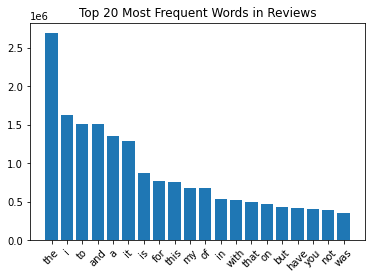

In [36]:
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize words
words = " ".join(df["text"]).split()
word_freq = Counter(words)

# Top 20 words visualization
common_words = word_freq.most_common(20)
plt.bar(*zip(*common_words))
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Reviews")
plt.show()


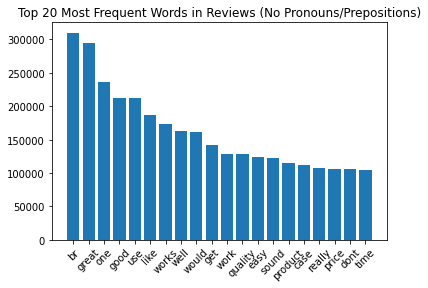

In [37]:
from collections import Counter
import matplotlib.pyplot as plt

# Define a simple list of common English pronouns and prepositions
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "can", "will", "just", "don", "should", "now"
])

# Tokenize words and remove stopwords (pronouns and prepositions)
words = " ".join(df["text"]).split()
filtered_words = [word for word in words if word not in stopwords]
word_freq = Counter(filtered_words)

# Top 20 words visualization
common_words = word_freq.most_common(20)
plt.bar(*zip(*common_words))
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Reviews (No Pronouns/Prepositions)")
plt.show()

In [38]:
df["duplicated_review"] = df["text"].duplicated()
print(df[df["duplicated_review"] == True])


        rating         title                text images        asin  \
249        5.0    Five Stars             love it     []  B01D2WRSF2   
707        5.0          Band         works great     []  B072FS9VVZ   
737        5.0      ECHO Dot             love it     []  B01DFKC2SO   
746        5.0   As Expected         as expected     []  B00009OY9U   
797        5.0    Five Stars             love it     []  B01ACEKAJY   
...        ...           ...                 ...    ...         ...   
999944     5.0  Great Value!          good value     []  B08C2G1J9M   
999959     5.0   Perfect thx  just what i needed     []  B07KQPHVCJ   
999960     5.0   Great value         great value     []  B07DCGFWNQ   
999962     5.0    Five Stars           beautiful     []  B0091L9RBC   
999994     5.0    Five Stars         outstanding     []  B008I63BN6   

       parent_asin                       user_id      timestamp  helpful_vote  \
249     B01D2WRSF2  AEJDETWITK2KGACH7FUBMY33PPSQ  1501864667611   